In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi
import numpy as np
import random

In [7]:
def bv_function(s):
    """
    Bernstein-Vazarani query function from 1s and 0s
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


In [41]:
def random_bit_string(n):
    """
    Generates random bit key as a string
    """
    bits = str(bin(random.randint(0,2**n)))[2:]
    n_bits = [int(i) for i in bits]
    if len(n_bits) < n:
        for i in range(n-len(n_bits)):
            bits = "0" + bits
    print(bits)
    return bits


00011101


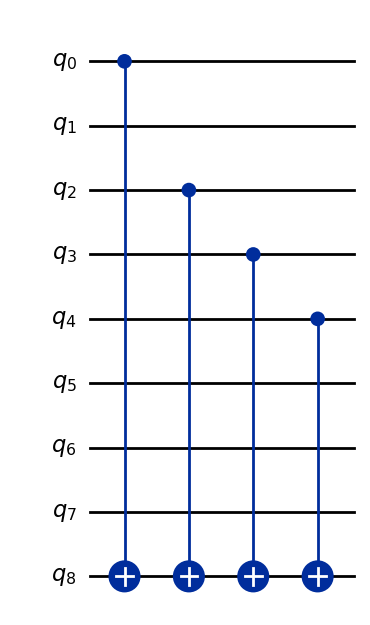

In [48]:
display(bv_function(random_bit_string(8)).draw(output='mpl'))

In [43]:
from Deutsch_Josza import compile_circuit
N = 8

In [52]:
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function(random_bit_string(N))))

11110011


'11110011'